# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


##About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing

In [5]:
company=pd.read_csv(r"E:\assignments csv  files\Company_Data.csv")

In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [8]:
company.shape

(400, 11)

In [9]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
#categorical features
categorical_feature=[feature for feature in company.columns if company[feature].dtype=="O"]
print("categorical features:",categorical_feature)

categorical features: ['ShelveLoc', 'Urban', 'US']


In [12]:
#numerical features
numerical_features=[feature for feature in company.columns if company[feature].dtypes!="O"]
print("numerical feature:",numerical_features)

numerical feature: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [13]:


company.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [14]:
company.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
company.US.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
#feature engineering
#Converting sales into categorical feature we will make 3 categories in sales like low, medium and good sales.

<Axes: xlabel='Sales', ylabel='Count'>

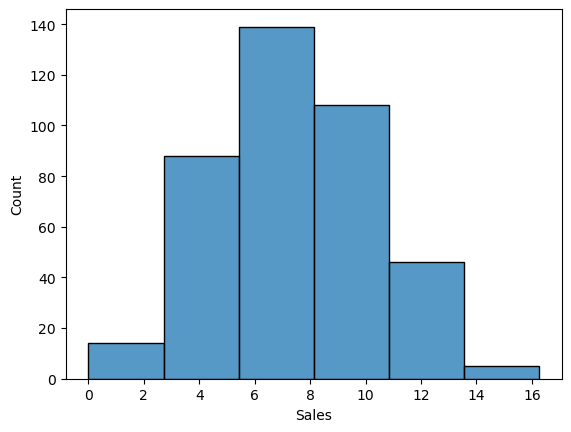

In [17]:
sns.histplot(x="Sales",data=company,bins=6)

In [18]:
company.Sales.max()

16.27

In [19]:
company.Sales.min()

0.0

In [20]:
#here we make a three category in sales high,medium,low
company.Sales.max()/3

5.423333333333333

In [21]:
company1=company.copy()
company1["sub_category"]=pd.cut(x=company1.Sales,bins=[0,5.5,11,17],labels=["low","medium","high"],right=False)
company1.drop(["Sales"],axis=1,inplace=True)

In [22]:
company1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sub_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [23]:
company1.sub_category.value_counts()

medium    248
low       103
high       49
Name: sub_category, dtype: int64

<Axes: xlabel='sub_category', ylabel='count'>

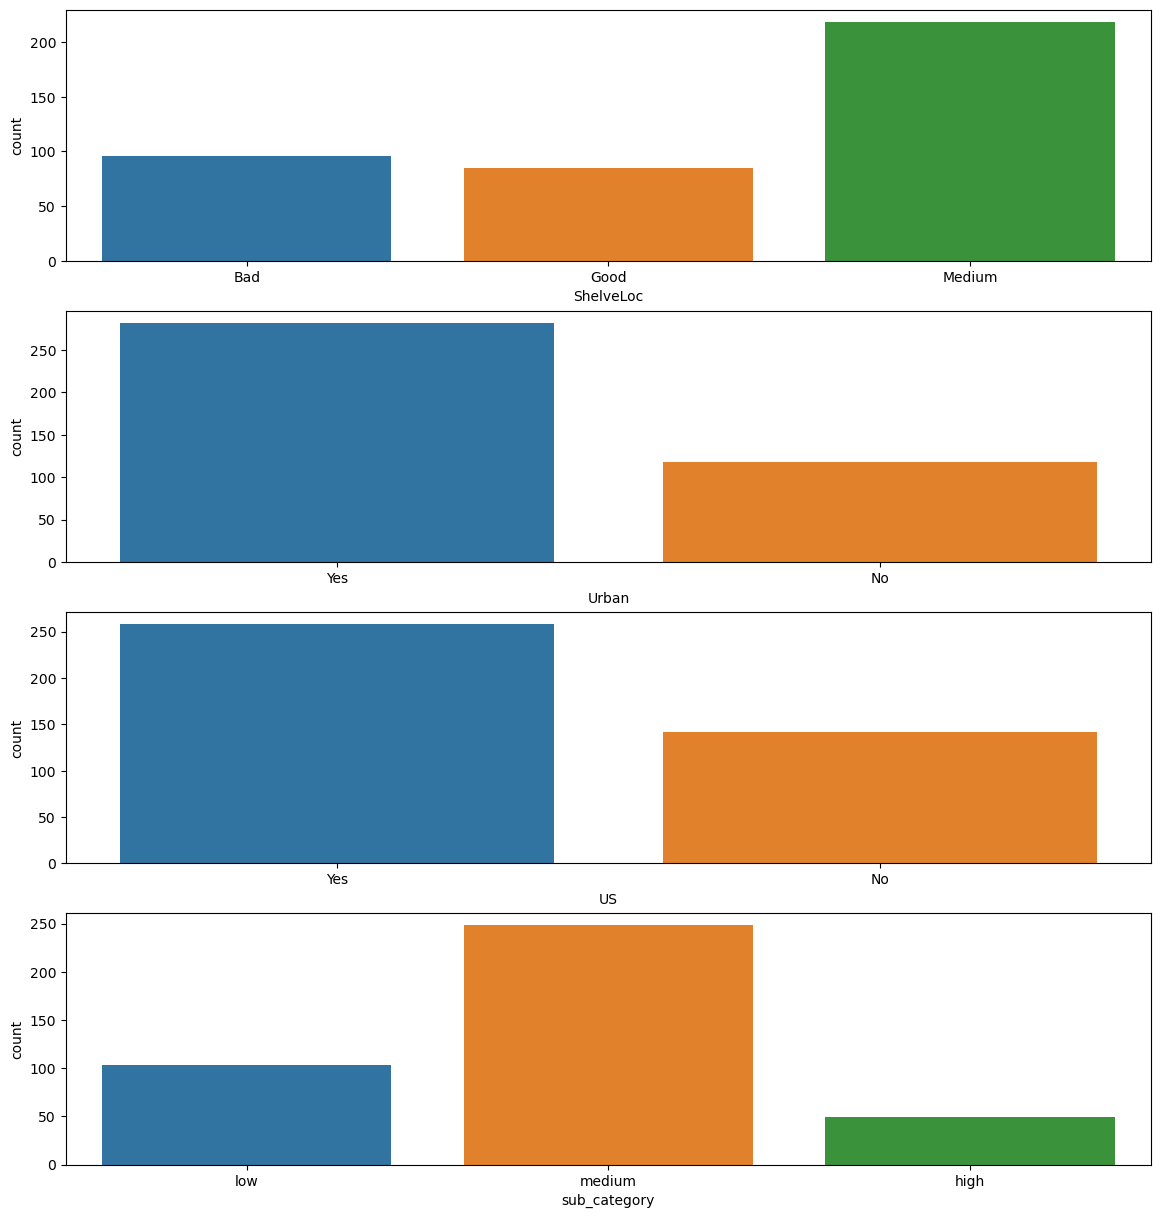

In [24]:
fig, ax=plt.subplots(4,1,figsize=(14,15))
sns.countplot(x="ShelveLoc",data=company1,ax=ax[0])
sns.countplot(x="Urban",data=company1,ax=ax[1])
sns.countplot(x="US",data=company1,ax=ax[2])

sns.countplot(x="sub_category",data=company1,ax=ax[3])

In [25]:
len(numerical_features)
print(numerical_features)

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


<Axes: xlabel='Education', ylabel='Count'>

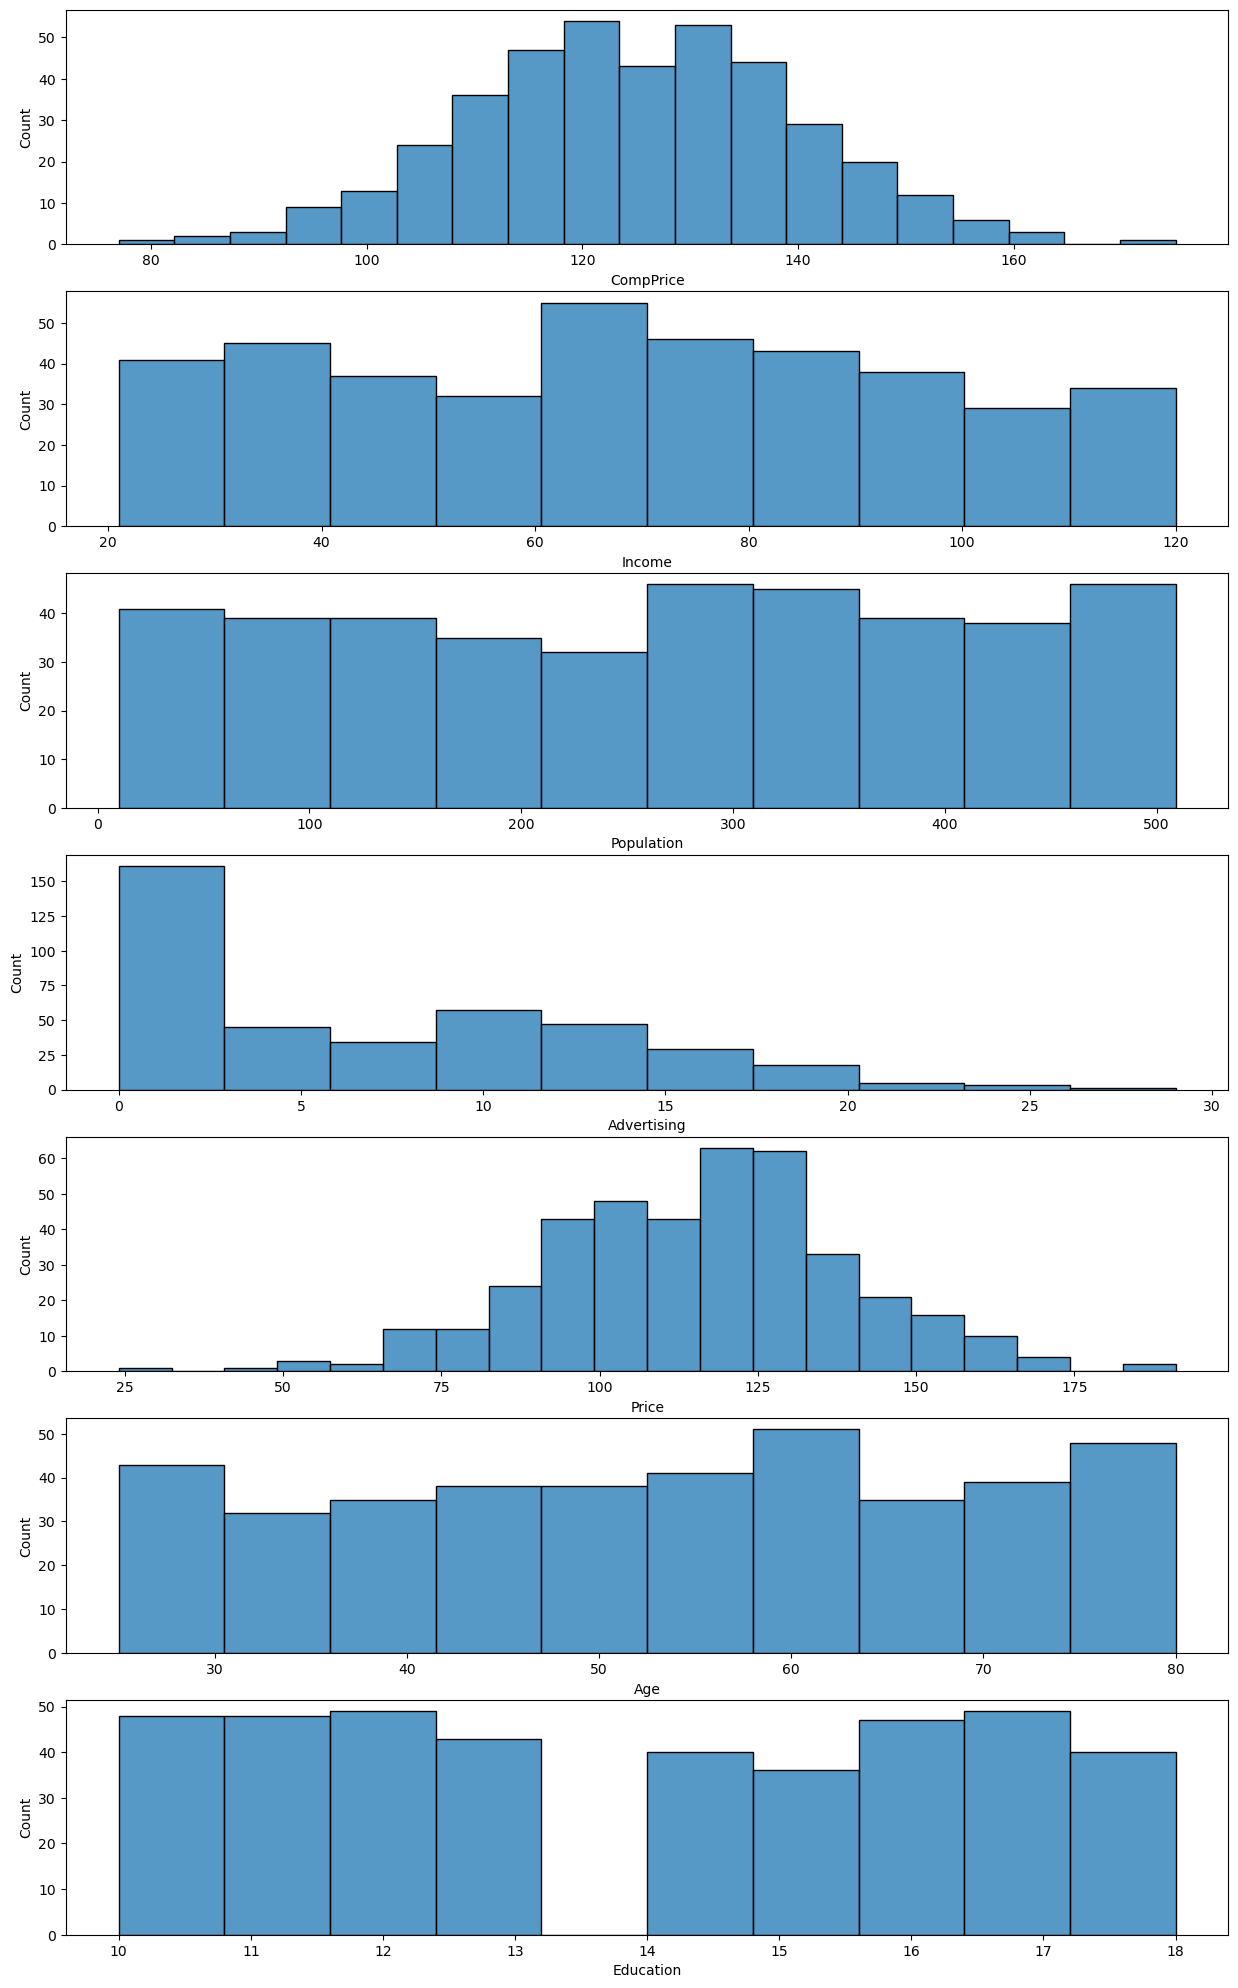

In [26]:
fig,ax=plt.subplots(7,1,figsize=(15,25))
sns.histplot(x="CompPrice",data=company1,ax=ax[0])
sns.histplot(x="Income",data=company1,ax=ax[1])
sns.histplot(x="Population",data=company1,ax=ax[2])
sns.histplot(x="Advertising",data=company1,ax=ax[3])
sns.histplot(x="Price",data=company1,ax=ax[4])

sns.histplot(x="Age",data=company1,ax=ax[5])
sns.histplot(x="Education",data=company1,ax=ax[6])

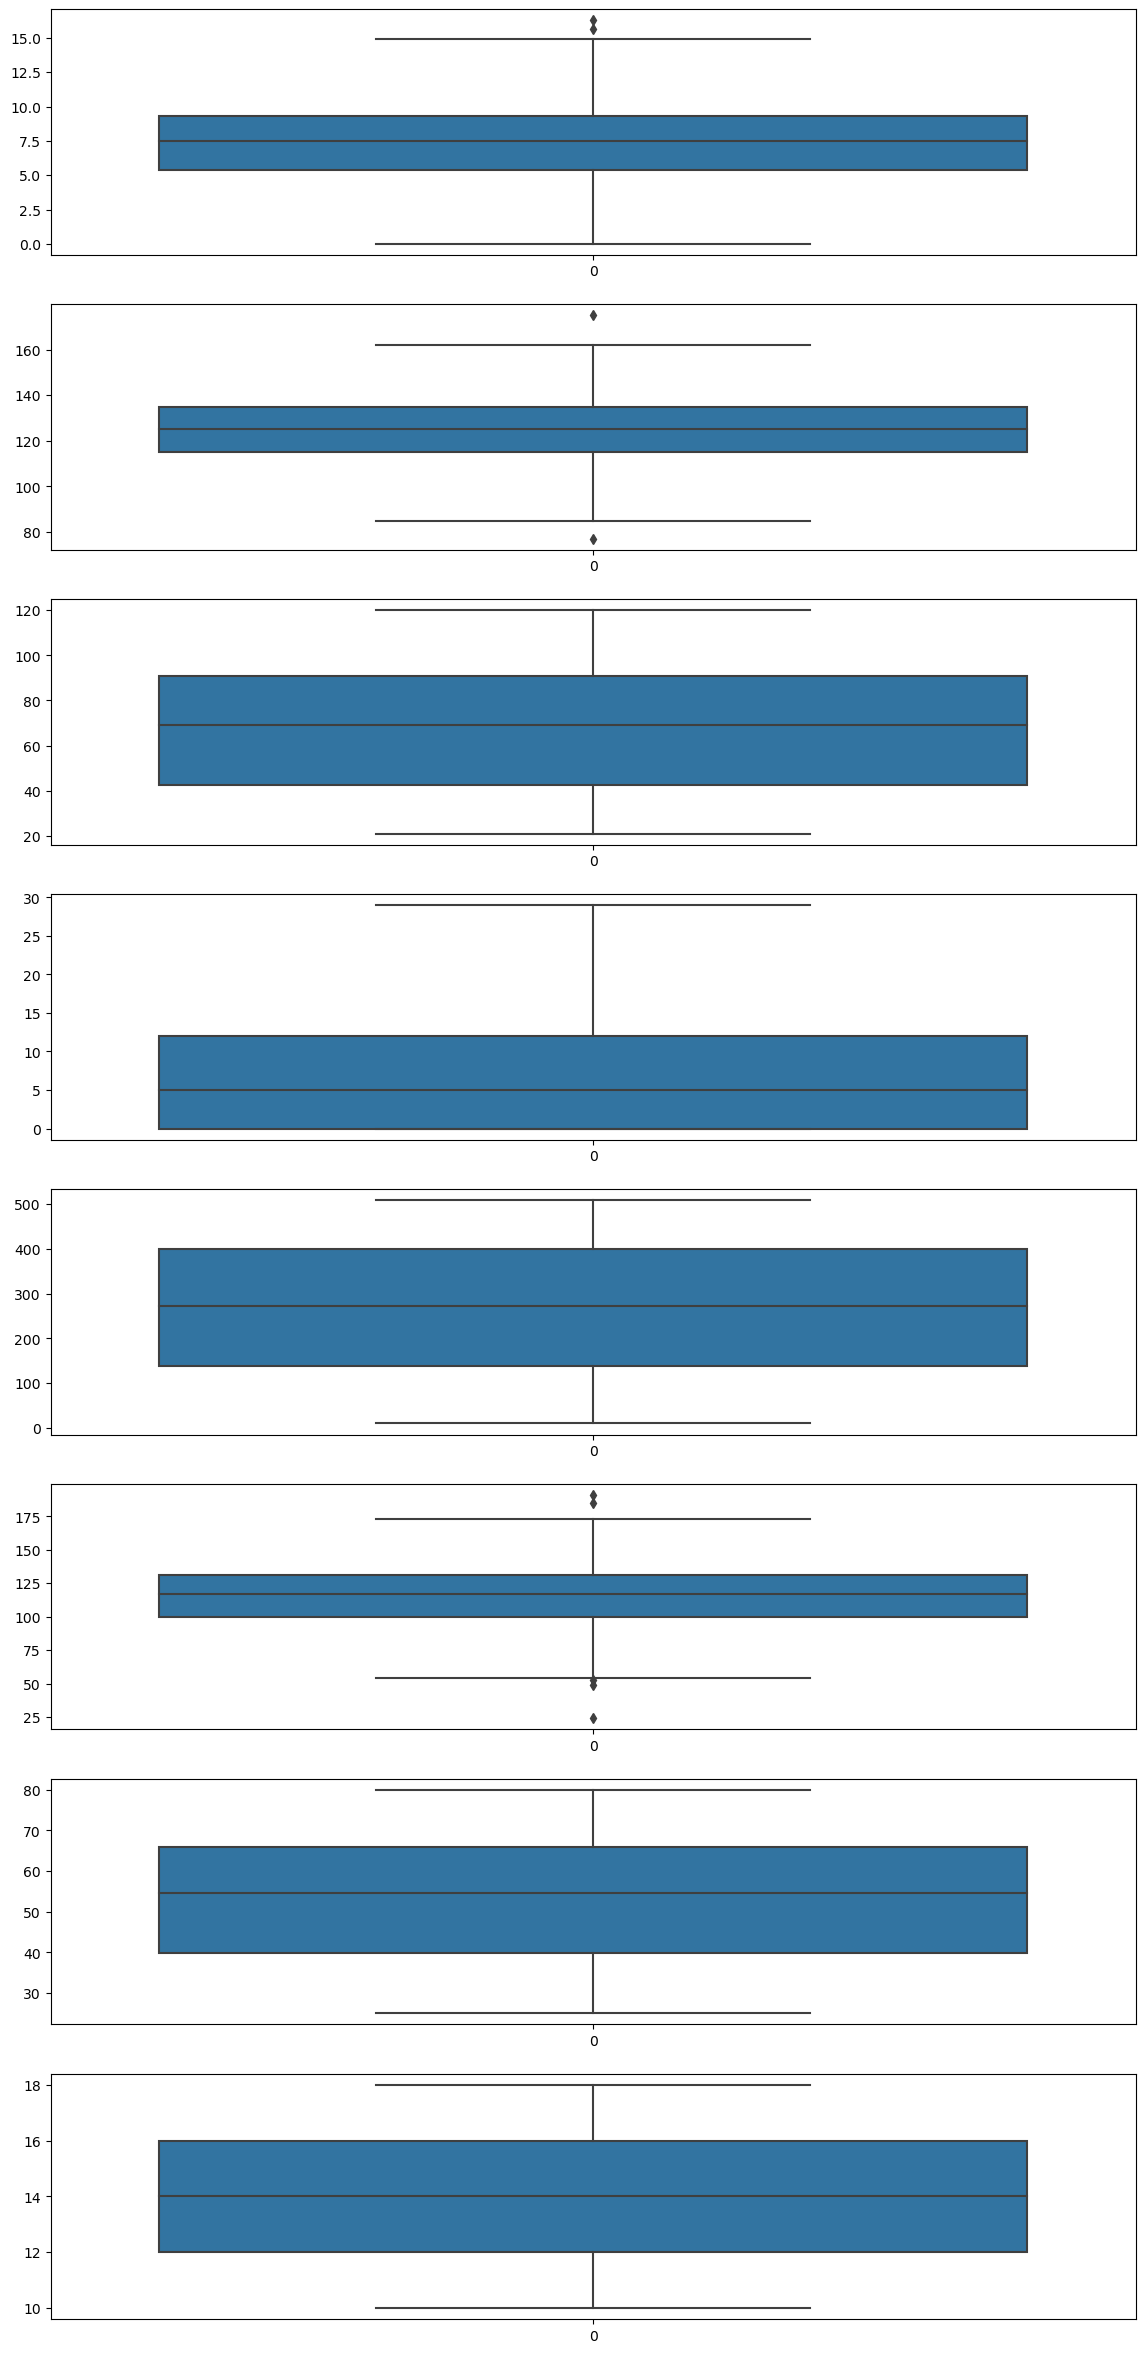

In [27]:
fig, axes=plt.subplots(len(numerical_features),1,figsize=(14,30))

for i in range (0, len(numerical_features)):
    sns.boxplot(company[numerical_features[i]],ax=axes[i])

In [28]:
company2 = company1.copy()

for feature in numerical_features:
    Q1,Q3 = np.percentile(company[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = company[feature][(company[feature] < ll) |  (company[feature] > ul)]
    
    company2=company2.drop(outliers.index[:] , errors="ignore")
    
    outliers=0 

In [29]:
print(company.shape)
print(company2.shape)

(400, 11)
(392, 11)


In [30]:
# data preprocessing

In [31]:
x=company2.drop(["sub_category"],axis=1)
y=company2["sub_category"]

In [32]:
x.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes


In [33]:
y.head(1)

0    medium
Name: sub_category, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [34]:
x=pd.get_dummies(x)

In [35]:
label=LabelEncoder()
y=label.fit_transform(y)

In [36]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [37]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 14)
(98, 14)
(294,)
(98,)


In [39]:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2 

In [40]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)

In [41]:
scores = fit.scores_
features = fit.transform(x) 

In [42]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df 


,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


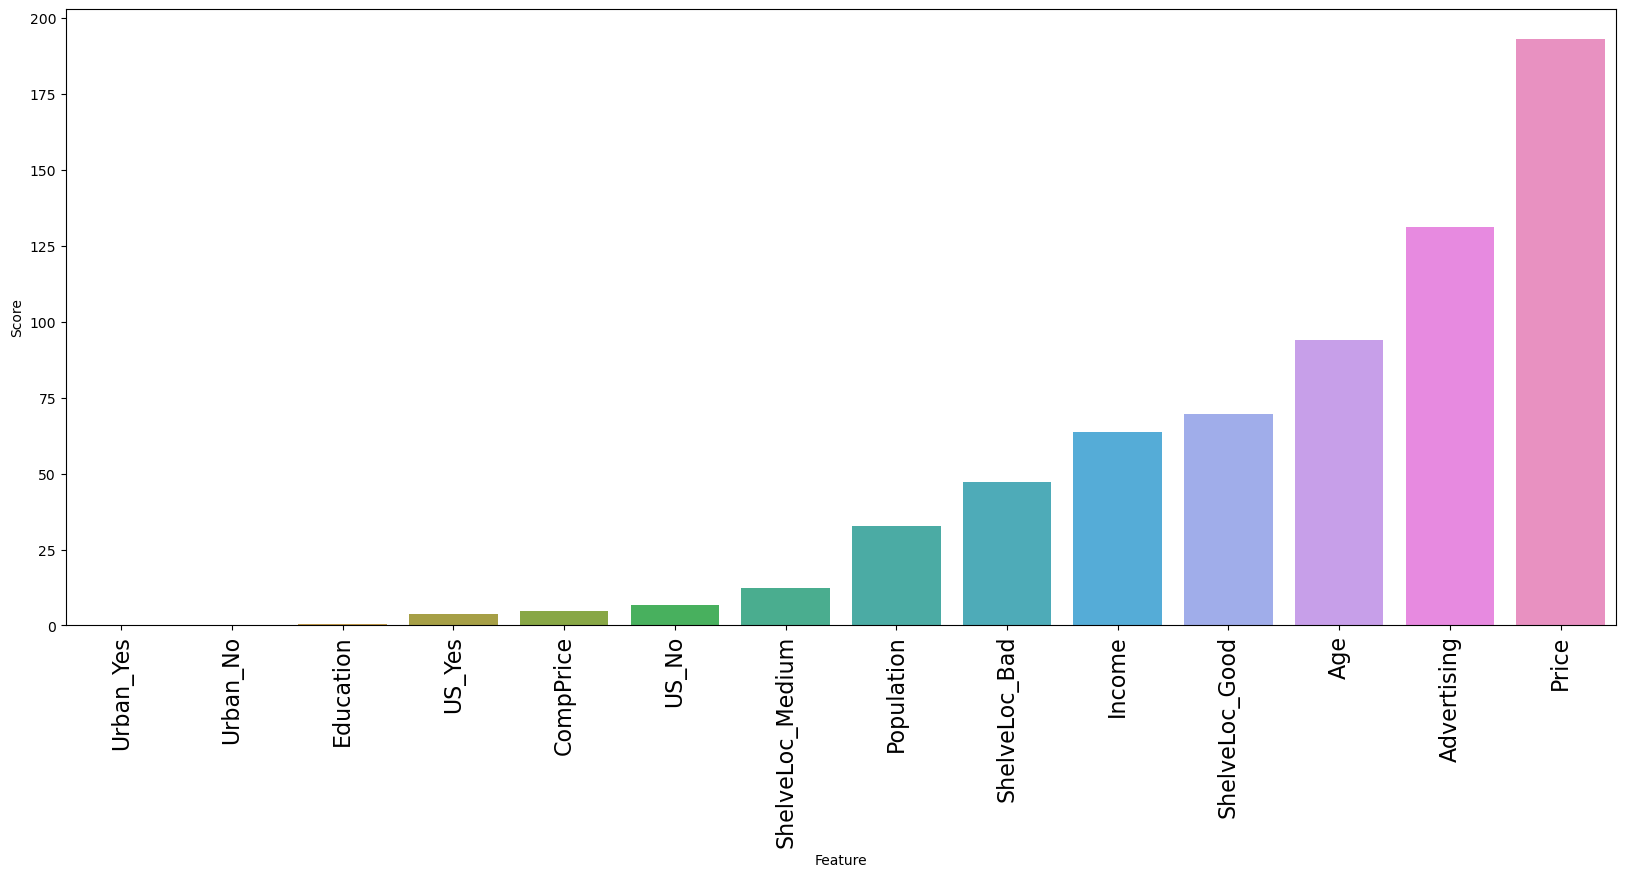

In [43]:

plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 90, fontsize = 16)
plt.show()
     

In [44]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [45]:


model_data_x

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [46]:
model_data_y = y 
model_data_y 

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

In [47]:
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

In [48]:
# building decision tree

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [50]:
#Predicting on test data
pred = model.predict(x_test) 
pred 

array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2])

In [51]:
cross=pd.crosstab(y_test,pred)
cross

col_0,0,1,2
row_0,,,
0,1,0,7
1,0,6,13
2,4,5,43


In [52]:
#accuracy
accuracy_score(y_test,pred)

0.6329113924050633

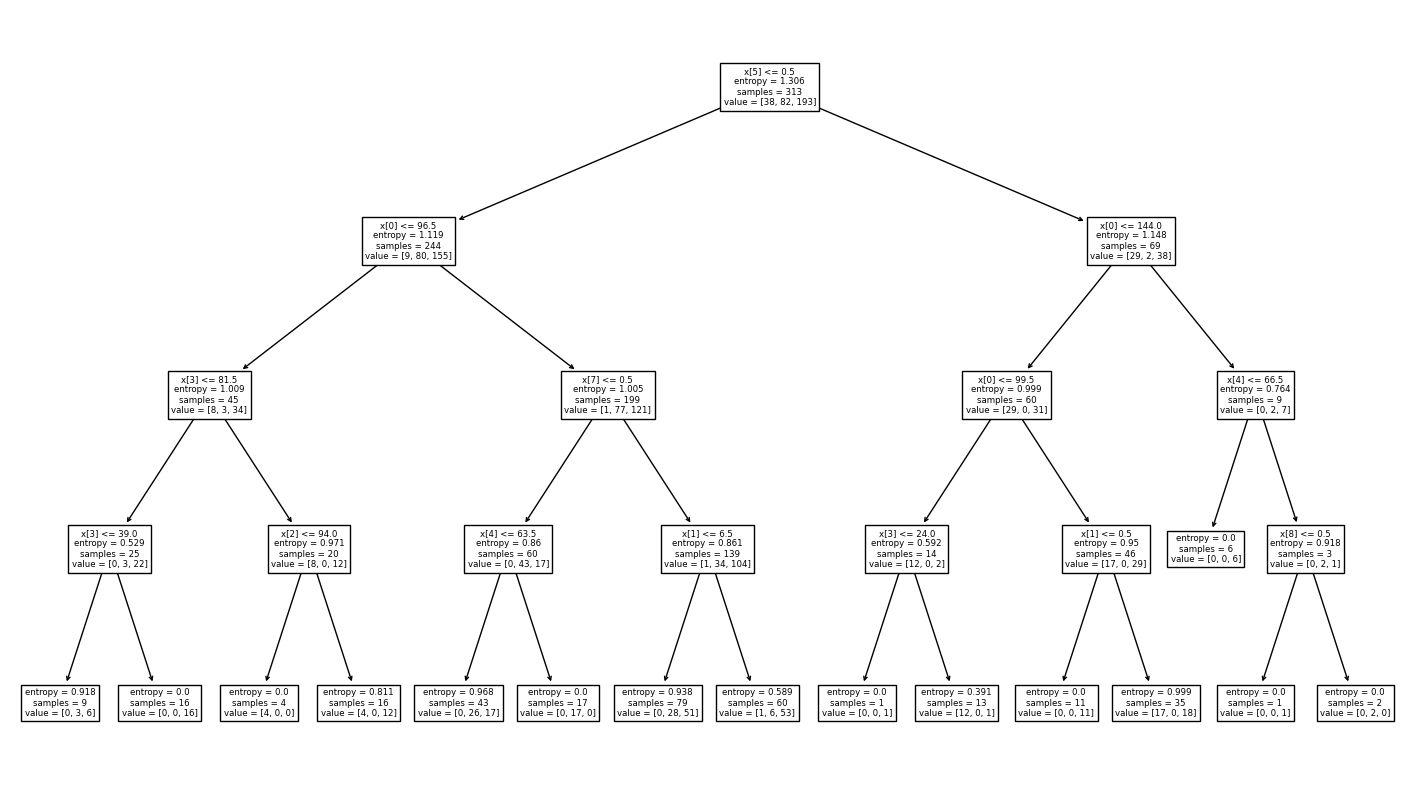

In [53]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(model)
plt.show() 

In [54]:
model=DecisionTreeClassifier(criterion="gini",max_depth=4)

In [55]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
pred=model.predict(x_test)

In [57]:
accuracy_score(y_test,pred)

0.6329113924050633

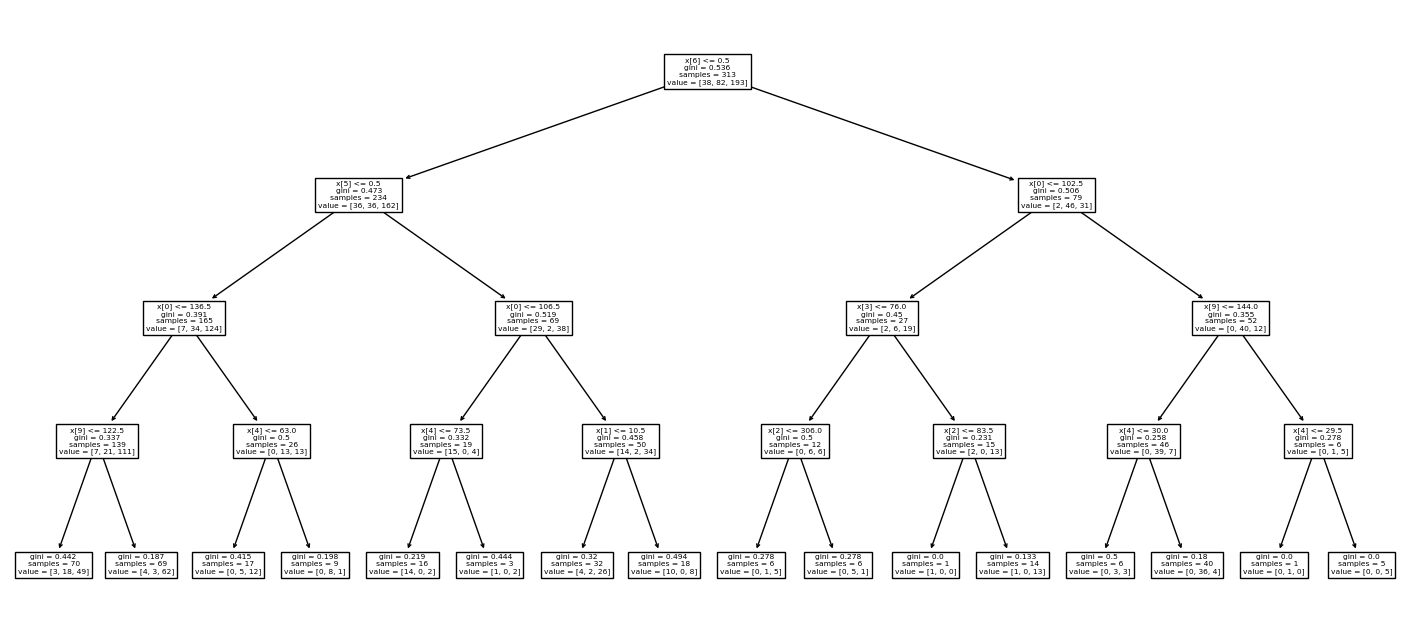

In [58]:
plt.figure(figsize=(18,8))
tree.plot_tree(model)
plt.show() 


In [59]:
# gridsearchcv for hyperparameter tuning

In [60]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [61]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [62]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_dict,cv=kfold)
grid.fit(model_data_x,model_data_y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [63]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 5}
0.714102564102564


In [64]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation is', np.round(results.mean(),3))  

Accuracy with k fold validation is 0.709


In [65]:
model = grid.best_estimator_ 

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred)) 

Accuracy with train test split: 0.6835443037974683


In [66]:
model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=5)

In [67]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.60      0.32      0.41        19
           2       0.71      0.88      0.79        52

    accuracy                           0.68        79
   macro avg       0.60      0.48      0.51        79
weighted avg       0.66      0.68      0.65        79



<Axes: >

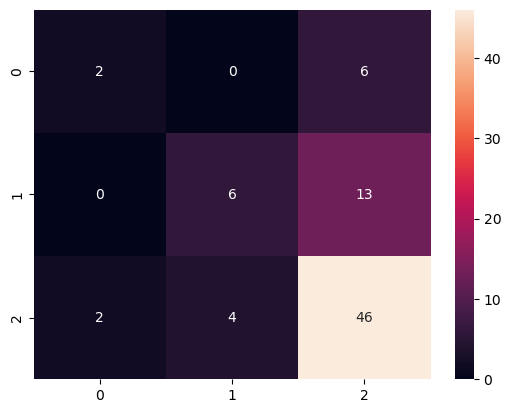

In [68]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True) 

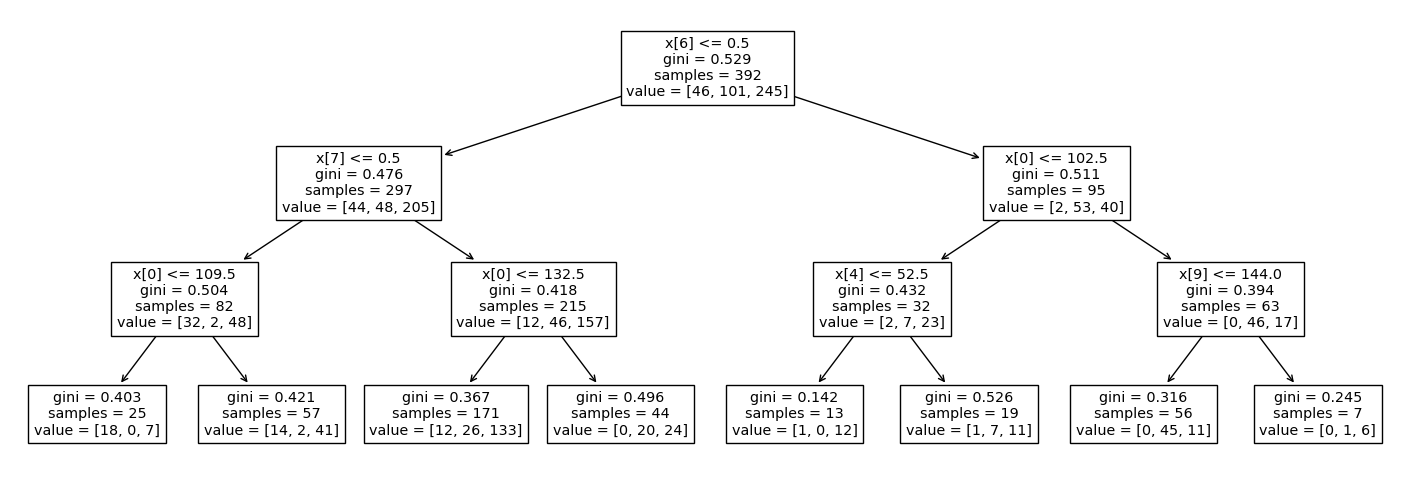

In [69]:
#PLot the decision tree
plt.figure(figsize=(18,6))
tree.plot_tree(model)
plt.show()

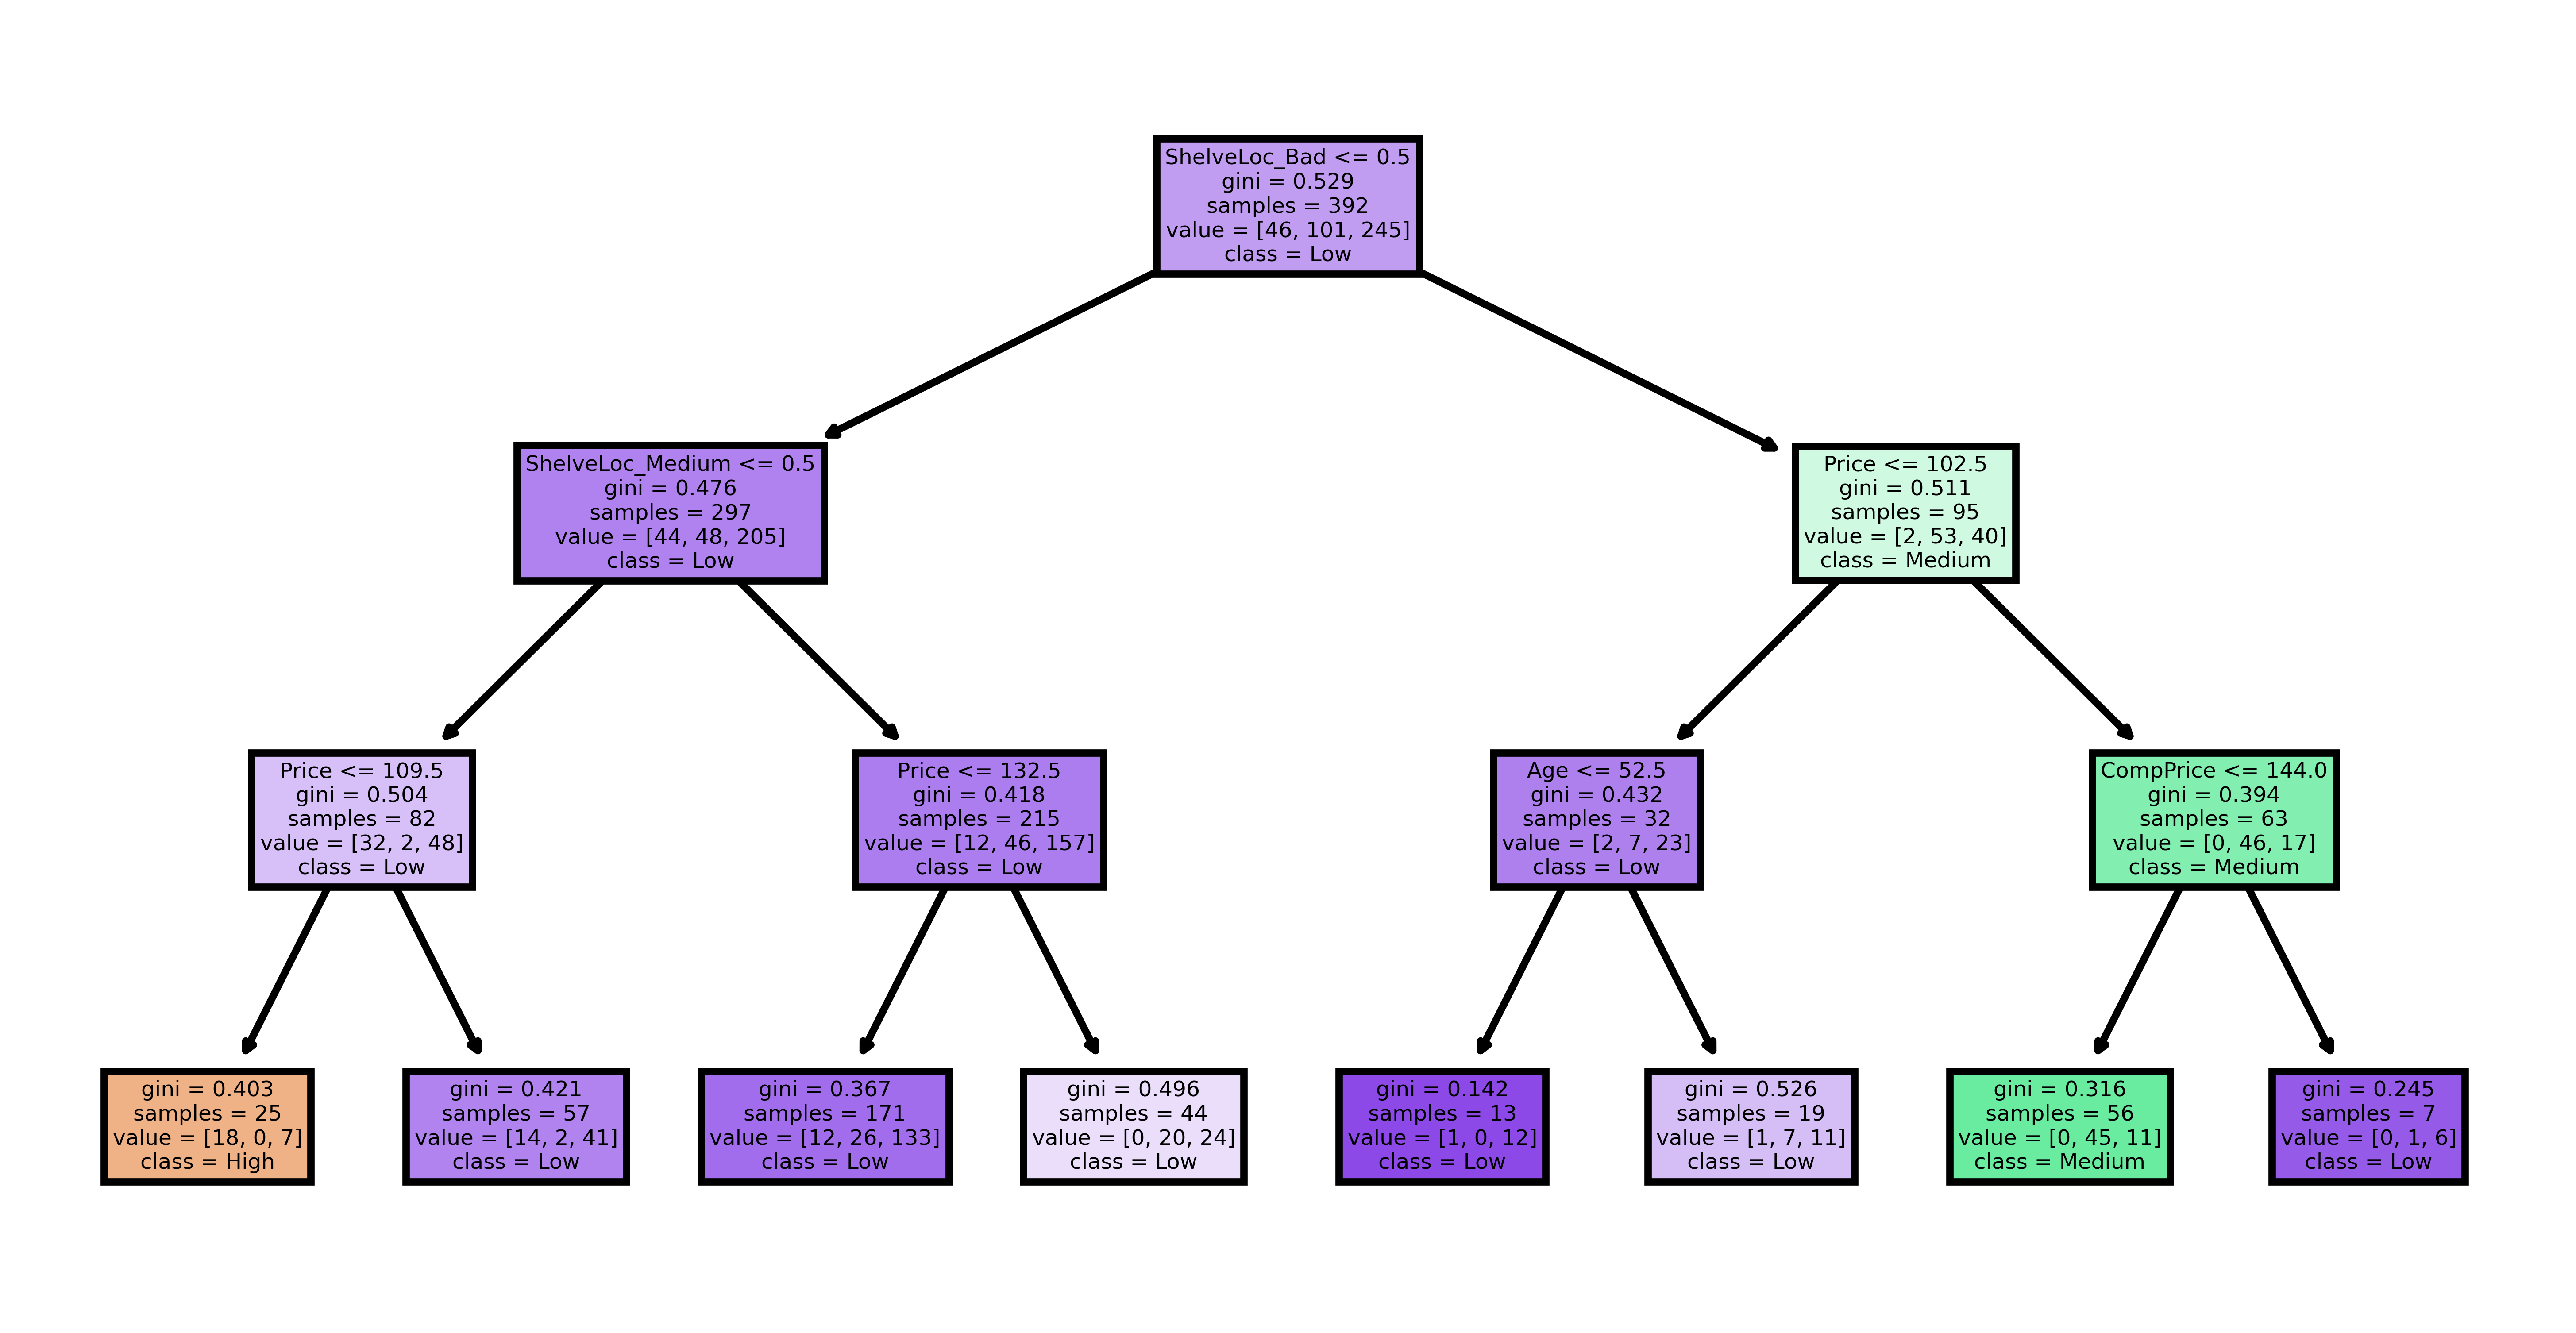

In [70]:
fn=['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad','ShelveLoc_Medium','US_No','CompPrice']
cn=['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=1200)
tree.plot_tree(model_kf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.savefig('tree.png',format='png',bbox_inches = "tight") 